In [44]:
# Import necessary libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Performn EDA on Dataset with Worldwide Conflicts

In [94]:
conflicts_data = pd.read_excel("project-immigration/data/conflicts.xls")

In [95]:
conflicts_data.head()

,gwno,country,year,ongoing,gwarea_tot,gwsum_bestdeaths,gwsum_best_sb,gwshare_confl,gwpop,gwpop_confl,gwpopshare_confl,maxintensity,maxcumulativeintensity,peaceyears,peaceyearshigh,postconflict,pop_affected,area_affected
0,2,United States of America,1989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,19.0,NaN,NaN,NaN
1,2,United States of America,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,20.0,NaN,NaN,NaN
2,2,United States of America,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,21.0,NaN,NaN,NaN
3,2,United States of America,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,22.0,NaN,NaN,NaN
4,2,United States of America,1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,23.0,NaN,NaN,NaN


In [96]:
#Delete rows with all NaN values

conflicts_data.dropna(how='all')
conflicts_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5016 entries, 0 to 5015
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gwno                    5016 non-null   int64  
 1   country                 5016 non-null   object 
 2   year                    5016 non-null   int64  
 3   ongoing                 4988 non-null   float64
 4   gwarea_tot              3203 non-null   float64
 5   gwsum_bestdeaths        3203 non-null   float64
 6   gwsum_best_sb           3203 non-null   float64
 7   gwshare_confl           449 non-null    float64
 8   gwpop                   3203 non-null   float64
 9   gwpop_confl             3203 non-null   float64
 10  gwpopshare_confl        449 non-null    float64
 11  maxintensity            807 non-null    float64
 12  maxcumulativeintensity  659 non-null    float64
 13  peaceyears              4225 non-null   float64
 14  peaceyearshigh          4225 non-null   

In [97]:
# Replace NaN values in numeric columns with the mean except the "Ongoing" column

for col in conflicts_data.columns:
    exclude_columns = ['ongoing', 'maxintensity', 'maxcumulativeintensity']

for col in conflicts_data.columns:
    if col not in exclude_columns:
        # Calculate the mean of the column, ignoring NaNs
        mean_value = pd.to_numeric(conflicts_data[col], errors='coerce').mean()
        # Replace NaN values with the mean value
        conflicts_data[col] = conflicts_data[col].fillna(mean_value)

conflicts_data.head()

,gwno,country,year,ongoing,gwarea_tot,gwsum_bestdeaths,gwsum_best_sb,gwshare_confl,gwpop,gwpop_confl,gwpopshare_confl,maxintensity,maxcumulativeintensity,peaceyears,peaceyearshigh,postconflict,pop_affected,area_affected
0,2,United States of America,1989,NaN,688213.070225,234.581954,171.199188,0.163036,3.523417e+07,2.524399e+06,0.241485,NaN,NaN,19.0,19.0,0.286296,24.148451,16.303622
1,2,United States of America,1990,NaN,688213.070225,234.581954,171.199188,0.163036,3.523417e+07,2.524399e+06,0.241485,NaN,NaN,20.0,20.0,0.286296,24.148451,16.303622
2,2,United States of America,1991,NaN,688213.070225,234.581954,171.199188,0.163036,3.523417e+07,2.524399e+06,0.241485,NaN,NaN,21.0,21.0,0.286296,24.148451,16.303622
3,2,United States of America,1992,NaN,688213.070225,234.581954,171.199188,0.163036,3.523417e+07,2.524399e+06,0.241485,NaN,NaN,22.0,22.0,0.286296,24.148451,16.303622
4,2,United States of America,1993,NaN,688213.070225,234.581954,171.199188,0.163036,3.523417e+07,2.524399e+06,0.241485,NaN,NaN,23.0,23.0,0.286296,24.148451,16.303622


In [98]:
# Determine how many conflicts are ongoing

conflicts_data.value_counts('ongoing')

ongoing
0.0    4197
1.0     791
Name: count, dtype: int64

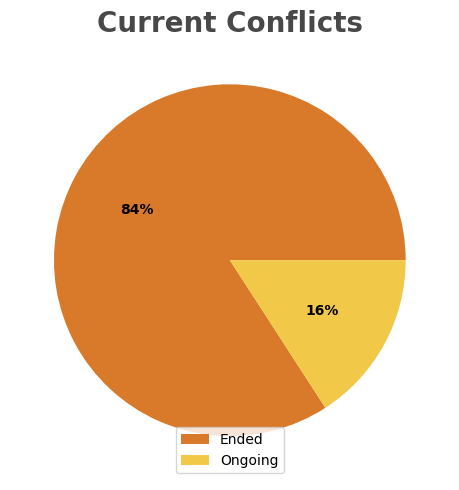

In [81]:
plt.figure(figsize=(10, 5))
colors = ["#D97A2B", "#F2C849", "#A13232","#A13232"]

# Get the counts of each type of owner
current_conflicts=conflicts_data.value_counts('ongoing',dropna=True)

# Create labels for the legend
labels = ['Ended','Ongoing']

# Plot the pie chart
patches, texts, autotexts = plt.pie(
    current_conflicts, colors=colors, autopct='%.0f%%', textprops={'fontsize': 10, 'fontweight': 'bold'}
)

# Add a legend
plt.legend(patches, labels, loc="lower center")

# Set title
plt.title('Current Conflicts', loc='center',
          fontdict={'fontsize': 20, 'fontweight': 'bold', 'color': '#484848'}) 

# Export figure
#plt.savefig("Who_owns_it.png", dpi=300)

# Show the plot
#plt.axis('equal')
plt.tight_layout()
plt.show()

In [122]:
#Determine the level of intensity of conflicts
conflicts_data.value_counts('maxintensity')

maxintensity
1.0    586
2.0    221
Name: count, dtype: int64

In [59]:
conflicts_data.columns

Index(['gwno', 'country', 'year', 'ongoing', 'gwarea_tot', 'gwsum_bestdeaths',
       'gwsum_best_sb', 'gwshare_confl', 'gwpop', 'gwpop_confl',
       'gwpopshare_confl', 'maxintensity', 'maxcumulativeintensity',
       'peaceyears', 'peaceyearshigh', 'postconflict', 'pop_affected',
       'area_affected'],
      dtype='object')

In [109]:
# Determine how many different countries there are
unique_countries = conflicts_data["country"].unique()
unique_countries

array(['United States of America', 'Canada', 'Bahamas', 'Cuba', 'Haiti',
       'Dominican Republic', 'Jamaica', 'Trinidad and Tobago', 'Barbados',
       'Dominica', 'Grenada', 'Saint Lucia',
       'Saint Vincent and the Grenadines', 'Antigua & Barbuda',
       'Saint Kitts and Nevis', 'Mexico', 'Belize', 'Guatemala',
       'Honduras', 'El Salvador', 'Nicaragua', 'Costa Rica', 'Panama',
       'Colombia', 'Venezuela', 'Guyana', 'Surinam', 'Ecuador', 'Peru',
       'Brazil', 'Bolivia', 'Paraguay', 'Chile', 'Argentina', 'Uruguay',
       'United Kingdom', 'Ireland', 'Netherlands', 'Belgium',
       'Luxembourg', 'France', 'Switzerland', 'Spain', 'Portugal',
       'German Federal Republic', 'Poland', 'Austria', 'Hungary',
       'Czechoslovakia', 'Czech Republic', 'Slovakia', 'Italy', 'Malta',
       'Albania', 'Serbia', 'Montenegro',
       'Macedonia (Former Yugoslav Republic of)', 'Croatia', 'Yugoslavia',
       'Bosnia-Herzegovina', 'Kosovo', 'Slovenia', 'Greece', 'Cyprus',
      

In [113]:
# Add the latitude and longitude of these countries to the data set to create maps in the future
countries_coordinates = {
    'United States of America': (37.0902, -95.7129),
    'Canada': (56.1304, -106.3468),
    'Bahamas': (25.0343, -77.3963),
    'Cuba': (21.5218, -77.7812),
    'Haiti': (18.9712, -72.2852),
    'Dominican Republic': (18.7357, -70.1627),
    'Jamaica': (18.1096, -77.2975),
    'Trinidad and Tobago': (10.6918, -61.2225),
    'Barbados': (13.1939, -59.5432),
    'Dominica': (15.4150, -61.3710),
    'Grenada': (12.1165, -61.6790),
    'Saint Lucia': (13.9094, -60.9789),
    'Saint Vincent and the Grenadines': (12.9843, -61.2872),
    'Antigua & Barbuda': (17.0608, -61.7964),
    'Saint Kitts and Nevis': (17.3578, -62.7830),
    'Mexico': (23.6345, -102.5528),
    'Belize': (17.1899, -88.4976),
    'Guatemala': (15.7835, -90.2308),
    'Honduras': (15.2000, -86.2419),
    'El Salvador': (13.7942, -88.8965),
    'Nicaragua': (12.8654, -85.2072),
    'Costa Rica': (9.7489, -83.7534),
    'Panama': (8.5379, -80.7821),
    'Colombia': (4.5709, -74.2973),
    'Venezuela': (6.4238, -66.5897),
    'Guyana': (4.8604, -58.9302),
    'Surinam': (3.9193, -56.0278),
    'Ecuador': (-1.8312, -78.1834),
    'Peru': (-9.1900, -75.0152),
    'Brazil': (-14.2350, -51.9253),
    'Bolivia': (-16.2902, -63.5887),
    'Paraguay': (-23.4425, -58.4438),
    'Chile': (-35.6751, -71.5430),
    'Argentina': (-38.4161, -63.6167),
    'Uruguay': (-32.5228, -55.7658),
    'United Kingdom': (55.3781, -3.4360),
    'Ireland': (53.1424, -7.6921),
    'Netherlands': (52.1326, 5.2913),
    'Belgium': (50.5039, 4.4699),
    'Luxembourg': (49.8153, 6.1296),
    'France': (46.6034, 1.8883),
    'Switzerland': (46.8182, 8.2275),
    'Spain': (40.4637, -3.7492),
    'Portugal': (39.3999, -8.2245),
    'German Federal Republic': (51.1657, 10.4515),
    'Poland': (51.9194, 19.1451),
    'Austria': (47.5162, 14.5501),
    'Hungary': (47.1625, 19.5033),
    'Czechoslovakia': (49.8175, 15.4730),
    'Czech Republic': (49.8175, 15.4730),
    'Slovakia': (48.6690, 19.6990),
    'Italy': (41.8719, 12.5674),
    'Malta': (35.9375, 14.3754),
    'Albania': (41.1533, 20.1683),
    'Serbia': (44.0165, 21.0059),
    'Montenegro': (42.7087, 19.3744),
    'Macedonia (Former Yugoslav Republic of)': (41.6086, 21.7453),
    'Croatia': (45.1000, 15.2000),
    'Yugoslavia': (44.7872, 20.4573),
    'Bosnia-Herzegovina': (43.9159, 17.6791),
    'Kosovo': (42.6026, 20.9020),
    'Slovenia': (46.1512, 14.9955),
    'Greece': (39.0742, 21.8243),
    'Cyprus': (35.1264, 33.4299),
    'Bulgaria': (42.7339, 25.4858),
    'Moldova': (47.4116, 28.3699),
    'Rumania': (45.9432, 24.9668),
    'Russia': (61.5240, 105.3188),
    'Estonia': (58.5953, 25.0136),
    'Latvia': (56.8796, 24.6032),
    'Lithuania': (55.1694, 23.8813),
    'Ukraine': (48.3794, 31.1656),
    'Belarus': (53.7098, 27.9534),
    'Armenia': (40.0691, 45.0382),
    'Georgia': (42.3154, 43.3569),
    'Azerbaijan': (40.1431, 47.5769),
    'Finland': (61.9241, 25.7482),
    'Sweden': (60.1282, 18.6435),
    'Norway': (60.4720, 8.4689),
    'Denmark': (56.2639, 9.5018),
    'Iceland': (64.9631, -19.0208),
    'Cape Verde': (16.5388, -23.0418),
    'São Tomé and Principe': (0.1864, 6.6131),
    'Guinea-Bissau': (11.8037, -15.1804),
    'Equatorial Guinea': (1.6508, 10.2679),
    'Gambia': (13.4432, -15.3101),
    'Mali': (17.5707, -3.9962),
    'Senegal': (14.4974, -14.4524),
    'Benin': (9.3077, 2.3158),
    'Mauritania': (21.0079, -10.9408),
    'Niger': (17.6078, 8.0817),
    'Cote D’Ivoire': (7.5399, -5.5471),
    'Guinea': (9.9456, -9.6966),
    'Burkina Faso': (12.2383, -1.5616),
    'Liberia': (6.4281, -9.4295),
    'Sierra Leone': (8.4606, -11.7799),
    'Ghana': (7.9465, -1.0232),
    'Togo': (8.6195, 0.8248),
    'Cameroon': (7.3697, 12.3547),
    'Nigeria': (9.0820, 8.6753),
    'Gabon': (-0.8037, 11.6094),
    'Central African Republic': (6.6111, 20.9394),
    'Chad': (15.4542, 18.7322),
    'Congo': (-0.2280, 15.8277),
    'DRC': (-4.0383, 21.7587),
    'Uganda': (1.3733, 32.2903),
    'Kenya': (-1.2921, 36.8219),
    'Tanzania': (-6.3690, 34.8888),
    'Burundi': (-3.3731, 29.9189),
    'Rwanda': (-1.9403, 29.8739),
    'Somalia': (5.1521, 46.1996),
    'Djibouti': (11.8251, 42.5903),
    'Ethiopia': (9.1450, 40.4897),
    'Eritrea': (15.1794, 39.7823),
    'Angola': (-11.2027, 17.8739),
    'Mozambique': (-18.6657, 35.5296),
    'Zambia': (-13.1339, 27.8493),
    'Zimbabwe': (-19.0154, 29.1549),
    'Malawi': (-13.2543, 34.3015),
    'South Africa': (-30.5595, 22.9375),
    'Namibia': (-22.9576, 18.4904),
    'Lesotho': (-29.6099, 28.2336),
    'Botswana': (-22.3285, 24.6849),
    'Swaziland': (-26.5225, 31.4659),
    'Madagascar': (-18.7669, 46.8691),
    'Comoros': (-11.6455, 43.3333),
    'Mauritius': (-20.3484, 57.5522),
    'Seychelles': (-4.6796, 55.4920),
    'Morocco': (31.7917, -7.0926),
    'Algeria': (28.0339, 1.6596),
    'Tunisia': (33.8869, 9.5375),
    'Libya': (26.3351, 17.2283),
    'Sudan': (12.8628, 30.2176),
    'South Sudan': (6.8770, 31.3070),
    'Iran': (32.4279, 53.6880),
    'Turkey': (38.9637, 35.2433),
    'Iraq': (33.2232, 43.6793),
    'Egypt': (26.8206, 30.8025),
    'Syria': (34.8021, 38.9968),
    'Lebanon': (33.8547, 35.8623),
    'Jordan': (30.5852, 36.2384),
    'Israel': (31.0461, 34.8516),
    'Saudi Arabia': (23.8859, 45.0792),
    'Yemen': (15.5527, 48.5164),
    'Kuwait': (29.3759, 47.9774),
    'Bahrain': (26.0667, 50.5577),
    'Qatar': (25.3548, 51.1839),
    'United Arab Emirates': (23.4241, 53.8478),
    'Oman': (21.4735, 55.9754),
    'Afghanistan': (33.9391, 67.7100),
    'Turkmenistan': (38.9697, 59.5563),
    'Tajikistan': (38.8610, 71.2761),
    'Kyrgyz Republic': (41.2044, 74.7661),
    'Uzbekistan': (41.3775, 64.5853),
    'Kazakhstan': (48.0196, 66.9237),
    'China': (35.8617, 104.1954),
    'Mongolia': (46.8625, 103.8467),
    "Korea, People's Republic of": (40.3399, 127.5101),
    'Korea, Republic of': (35.9078, 127.7669),
    'Japan': (36.2048, 138.2529),
    'India': (20.5937, 78.9629),
    'Bhutan': (27.5142, 90.4336),
    'Pakistan': (30.3753, 69.3451),
    'Bangladesh': (23.6850, 90.3563),
    'Myanmar': (21.9162, 95.9560),
    'Sri Lanka': (7.8731, 80.7718),
    'Maldives': (3.2028, 73.2207),
    'Nepal': (28.3949, 84.1240),
    'Thailand': (15.8700, 100.9925),
    'Cambodia (Kampuchea)': (12.5657, 104.9910),
    'Laos': (19.8563, 102.4955),
    'Vietnam, Democratic Republic of': (14.0583, 108.2772),
    'Malaysia': (4.2105, 101.9758),
    'Singapore': (1.3521, 103.8198),
    'Brunei': (4.5353, 114.7277),
    'Philippines': (12.8797, 121.7740),
    'Indonesia': (-0.7893, 113.9213),
    'East Timor': (-8.8742, 125.7275),
    'Australia': (-25.2744, 133.7751),
    'Papua New Guinea': (-6.314993, 143.95555),
    'New Zealand': (-40.9006, 174.8860),
    'Vanuatu': (-15.3767, 166.9592),
    'Solomon Islands': (-9.6457, 160.1562),
    'Fiji': (-17.7134, 178.0650),
    'Kiribati': (-3.3704, -168.7340),
    'Nauru': (-0.5228, 166.9315),
    'Tonga': (-21.178986, -175.198242),
    'Tuvalu': (-7.1095, 179.194),
    'Marshall Islands': (7.1315, 171.1845),
    'Palau': (7.51498, 134.58252),
    'Federated States of Micronesia': (7.425554, 150.550812),
    'American Samoa': (-14.270972, -170.132217)
}

# Add latitude and longitude columns to the DataFrame using the predefined coordinates
conflicts_data['coordinates'] = conflicts_data['country'].map(lambda x: countries_coordinates.get(x, (None, None)))

# Display the updated DataFrame
conflicts_data.head()

,gwno,country,year,ongoing,gwarea_tot,gwsum_bestdeaths,gwsum_best_sb,gwshare_confl,gwpop,gwpop_confl,gwpopshare_confl,maxintensity,maxcumulativeintensity,peaceyears,peaceyearshigh,postconflict,pop_affected,area_affected,coordinates
0,2,United States of America,1989,NaN,688213.070225,234.581954,171.199188,0.163036,3.523417e+07,2.524399e+06,0.241485,NaN,NaN,19.0,19.0,0.286296,24.148451,16.303622,"(37.0902, -95.7129)"
1,2,United States of America,1990,NaN,688213.070225,234.581954,171.199188,0.163036,3.523417e+07,2.524399e+06,0.241485,NaN,NaN,20.0,20.0,0.286296,24.148451,16.303622,"(37.0902, -95.7129)"
2,2,United States of America,1991,NaN,688213.070225,234.581954,171.199188,0.163036,3.523417e+07,2.524399e+06,0.241485,NaN,NaN,21.0,21.0,0.286296,24.148451,16.303622,"(37.0902, -95.7129)"
3,2,United States of America,1992,NaN,688213.070225,234.581954,171.199188,0.163036,3.523417e+07,2.524399e+06,0.241485,NaN,NaN,22.0,22.0,0.286296,24.148451,16.303622,"(37.0902, -95.7129)"
4,2,United States of America,1993,NaN,688213.070225,234.581954,171.199188,0.163036,3.523417e+07,2.524399e+06,0.241485,NaN,NaN,23.0,23.0,0.286296,24.148451,16.303622,"(37.0902, -95.7129)"


In [117]:
import folium

# Calculate the count of conflicts per country
conflicts_per_country = conflicts_data['country'].value_counts().to_dict()

# Create a world map
map_conflicts = folium.Map(location=[0, 0], zoom_start=3, tiles="CartoDB dark_matter")

# Add points to the map with sizes based on the count of conflicts
for country, count in conflicts_per_country.items():
    if country in countries_coordinates:
        folium.CircleMarker(
            location=countries_coordinates[country],
            radius=count ** 0.5,  # Use the square root to normalize the size
            popup=country,
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.7,
            weight=2
        ).add_to(map_conflicts)

map_conflicts

In [128]:
# Calculate how many conflicts per country

conflicts_per_country_year = conflicts_data.groupby(['country', 'year']).size().reset_index(name='conflict_count')

# Pivot the DataFrame to have years as columns
conflicts_pivot = conflicts_per_country_year.pivot(index='country', columns='year', values='conflict_count').fillna(0)

conflicts_pivot.head(25)

year,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Albania,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Algeria,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
American Samoa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Angola,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Antigua & Barbuda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Argentina,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Armenia,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Australia,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [130]:
# Calculate conflicts per year

conflicts_per_year_country = conflicts_data.groupby(['year', 'country']).size().reset_index(name='conflict_count')

# Pivot the DataFrame to have years as columns
conflicts_pivot1 = conflicts_per_year_country.pivot(index='year', columns='country', values='conflict_count').fillna(0)

conflicts_pivot1.head(25)

country,Afghanistan,Albania,Algeria,American Samoa,Angola,Antigua & Barbuda,Argentina,Armenia,Australia,Austria,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela,"Vietnam, Democratic Republic of",Yemen,Yugoslavia,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1989,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
1990,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
1991,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
1992,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
1993,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
1994,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
1995,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
1996,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
1997,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0


In [125]:
# Calculate how many deaths per country

deaths_per_country = conflicts_data.groupby('country')['gwsum_bestdeaths'].sum().reset_index(name='total_deaths')

deaths_per_country.head(25)

,country,total_deaths
0,Afghanistan,122121.401499
1,Albania,2580.401499
2,Algeria,9872.401499
3,American Samoa,0.000000
4,Angola,6774.401499
5,Antigua & Barbuda,0.000000
6,Argentina,2580.401499
7,Armenia,2142.237590
8,Australia,2580.401499
9,Austria,2580.401499


In [121]:
deaths_per_year = conflicts_data.groupby('year')['gwsum_bestdeaths'].sum().reset_index(name='total_deaths')

deaths_per_year.head()

,year,total_deaths
0,1989,34718.129254
1,1990,34952.711208
2,1991,38706.022479
3,1992,39175.186388
4,1993,39644.350297


In [133]:
deaths_per_country_year = conflicts_data.groupby(['year', 'country'])['gwsum_bestdeaths'].sum().reset_index(name='death_count')

# Pivot the DataFrame to have years as columns
deaths_per_country_year = deaths_per_country_year.pivot(index='year', columns='country', values='death_count').fillna(0)

deaths_per_country_year.head(25)

country,Afghanistan,Albania,Algeria,American Samoa,Angola,Antigua & Barbuda,Argentina,Armenia,Australia,Austria,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela,"Vietnam, Democratic Republic of",Yemen,Yugoslavia,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1989,234.581954,234.581954,234.581954,0.0,234.581954,0.0,234.581954,0.000000,234.581954,234.581954,...,234.581954,234.581954,0.000000,0.0,234.581954,234.581954,234.581954,234.581954,234.581954,234.581954
1990,234.581954,234.581954,234.581954,0.0,234.581954,0.0,234.581954,0.000000,234.581954,234.581954,...,234.581954,234.581954,0.000000,0.0,234.581954,234.581954,234.581954,234.581954,234.581954,234.581954
1991,234.581954,234.581954,234.581954,0.0,234.581954,0.0,234.581954,234.581954,234.581954,234.581954,...,234.581954,234.581954,234.581954,0.0,234.581954,234.581954,234.581954,234.581954,234.581954,234.581954
1992,234.581954,234.581954,234.581954,0.0,234.581954,0.0,234.581954,234.581954,234.581954,234.581954,...,234.581954,234.581954,234.581954,0.0,234.581954,234.581954,234.581954,234.581954,234.581954,234.581954
1993,234.581954,234.581954,234.581954,0.0,234.581954,0.0,234.581954,234.581954,234.581954,234.581954,...,234.581954,234.581954,234.581954,0.0,234.581954,234.581954,234.581954,234.581954,234.581954,234.581954
1994,234.581954,234.581954,234.581954,0.0,234.581954,0.0,234.581954,234.581954,234.581954,234.581954,...,234.581954,234.581954,234.581954,0.0,234.581954,234.581954,234.581954,234.581954,234.581954,234.581954
1995,234.581954,234.581954,234.581954,0.0,234.581954,0.0,234.581954,234.581954,234.581954,234.581954,...,234.581954,234.581954,234.581954,0.0,234.581954,234.581954,234.581954,234.581954,234.581954,234.581954
1996,234.581954,234.581954,234.581954,0.0,234.581954,0.0,234.581954,234.581954,234.581954,234.581954,...,234.581954,234.581954,234.581954,0.0,234.581954,234.581954,234.581954,234.581954,234.581954,234.581954
1997,234.581954,234.581954,234.581954,0.0,234.581954,0.0,234.581954,234.581954,234.581954,234.581954,...,234.581954,234.581954,234.581954,0.0,234.581954,234.581954,234.581954,234.581954,234.581954,234.581954


In [134]:
deaths_per_year_country = conflicts_data.groupby(['country', 'year'])['gwsum_bestdeaths'].sum().reset_index(name='death_count')

# Pivot the DataFrame to have years as columns
deaths_per_year_country = deaths_per_year_country.pivot(index='country', columns='year', values='death_count').fillna(0)

deaths_per_year_country.head(25)

year,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,234.581954,234.581954,234.581954,234.581954,234.581954,234.581954,234.581954,234.581954,234.581954,234.581954,...,6855.0,5444.0,6877.0,7007.0,7382.0,7519.0,8126.0,13051.0,17837.0,18548.0
Albania,234.581954,234.581954,234.581954,234.581954,234.581954,234.581954,234.581954,234.581954,234.581954,234.581954,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Algeria,234.581954,234.581954,234.581954,234.581954,234.581954,234.581954,234.581954,234.581954,234.581954,234.581954,...,495.0,345.0,541.0,252.0,276.0,264.0,222.0,107.0,84.0,67.0
American Samoa,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Angola,234.581954,234.581954,234.581954,234.581954,234.581954,234.581954,234.581954,234.581954,234.581954,234.581954,...,59.0,4.0,25.0,7.0,1.0,0.0,2.0,0.0,0.0,17.0
Antigua & Barbuda,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Argentina,234.581954,234.581954,234.581954,234.581954,234.581954,234.581954,234.581954,234.581954,234.581954,234.581954,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Armenia,0.000000,0.000000,234.581954,234.581954,234.581954,234.581954,234.581954,234.581954,234.581954,234.581954,...,0.0,0.0,0.0,0.0,0.0,10.0,1.0,0.0,16.0,2.0
Australia,234.581954,234.581954,234.581954,234.581954,234.581954,234.581954,234.581954,234.581954,234.581954,234.581954,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Performn EDA on Dataset with Migrant Deaths

In [33]:
migrant_deaths_data = pd.read_excel("project-immigration/data/Migrant_deaths.xlsx")

In [21]:
migrant_deaths_data.head()

,Main ID,Incident ID,Incident Type,Region of Incident,Incident Date,Incident Year,Month,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,...,Region of Origin,Cause of Death,Country of Incident,Migration Route,Location of Incident,Coordinates,UNSD Geographical Grouping,Information Source,URL,Source Quality
0,2014.MMP00001,2014.MMP00001,Incident,North America,2014-01-06,2014,January,1.0,NaN,1,...,Central America,Mixed or unknown,United States of America,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,"31.650259, -110.366453",Northern America,Pima County Office of the Medical Examiner (PC...,http://humaneborders.info/,5
1,2014.MMP00002,2014.MMP00002,Incident,North America,2014-01-12,2014,January,1.0,NaN,1,...,Latin America / Caribbean (P),Mixed or unknown,United States of America,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,"31.59713, -111.73756",Northern America,Pima County Office of the Medical Examiner (PC...,NaN,5
2,2014.MMP00003,2014.MMP00003,Incident,North America,2014-01-14,2014,January,1.0,NaN,1,...,Latin America / Caribbean (P),Mixed or unknown,United States of America,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,"31.94026, -113.01125",Northern America,Pima County Office of the Medical Examiner (PC...,NaN,5
3,2014.MMP00004,2014.MMP00004,Incident,North America,2014-01-16,2014,January,1.0,NaN,1,...,Central America,Violence,United States of America,US-Mexico border crossing,"near Douglas, Arizona, USA","31.506777, -109.315632",Northern America,"Ministry of Foreign Affairs Mexico, Pima Count...",http://bit.ly/1qfIw00,5
4,2014.MMP00005,2014.MMP00005,Incident,Europe,2014-01-16,2014,January,1.0,0.0,1,...,Northern Africa,Harsh environmental conditions / lack of adequ...,Russian Federation,NaN,Border between Russia and Estonia,"59.1551, 28",Northern Europe,EUBusiness (Agence France-Presse),http://bit.ly/1rTFTjR,1


In [40]:
# Drop rows with null values and check the values

migrant_deaths_data.dropna(how='all')
migrant_deaths_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16149 entries, 0 to 16148
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Main ID                              16149 non-null  object 
 1   Incident ID                          16149 non-null  object 
 2   Incident Type                        16149 non-null  object 
 3   Region of Incident                   16149 non-null  object 
 4   Incident Date                        16134 non-null  object 
 5   Incident Year                        16149 non-null  int64  
 6   Month                                16149 non-null  object 
 7   Number of Dead                       15340 non-null  float64
 8   Minimum Estimated Number of Missing  1611 non-null   float64
 9   Total Number of Dead and Missing     16149 non-null  int64  
 10  Number of Survivors                  2586 non-null   float64
 11  Number of Females           

In [159]:
# Replace NaN values in numeric columns with the mean
migrant_deaths_data.fillna(conflicts_data.mean(numeric_only=True), inplace=True)
migrant_deaths_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16149 entries, 0 to 16148
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Main ID                              16149 non-null  object 
 1   Incident ID                          16149 non-null  object 
 2   Incident Type                        16149 non-null  object 
 3   Region of Incident                   16149 non-null  object 
 4   Incident Date                        16134 non-null  object 
 5   Incident Year                        16149 non-null  int64  
 6   Month                                16149 non-null  object 
 7   Number of Dead                       15340 non-null  float64
 8   Minimum Estimated Number of Missing  1611 non-null   float64
 9   Total Number of Dead and Missing     16149 non-null  int64  
 10  Number of Survivors                  2586 non-null   float64
 11  Number of Females           

In [135]:
migrant_deaths_data.columns

Index(['Main ID', 'Incident ID', 'Incident Type', 'Region of Incident',
       'Incident Date', 'Incident Year', 'Month', 'Number of Dead',
       'Minimum Estimated Number of Missing',
       'Total Number of Dead and Missing', 'Number of Survivors',
       'Number of Females', 'Number of Males', 'Number of Children',
       'Country of Origin', 'Region of Origin', 'Cause of Death',
       'Country of Incident', 'Migration Route', 'Location of Incident',
       'Coordinates', 'UNSD Geographical Grouping', 'Information Source',
       'URL', 'Source Quality'],
      dtype='object')

In [149]:
# Calculate the cause of death

migrant_deaths_data.value_counts('Cause of Death')

Cause of Death
Drowning                                                                  4119
Mixed or unknown                                                          3545
Vehicle accident / death linked to hazardous transport                    2697
Harsh environmental conditions / lack of adequate shelter, food, water    1758
Sickness / lack of access to adequate healthcare                          1720
Violence                                                                  1630
Accidental death                                                           680
Name: count, dtype: int64

In [161]:
# Calculate deaths per country per year

deaths_per_country_year = migrant_deaths_data.groupby(['Country of Incident', 'Incident Year'])['Number of Dead'].sum().reset_index(name='total_deaths')

# Pivot the DataFrame to have years as columns
deaths_pivot = deaths_per_country_year.pivot(index='Country of Incident', columns='Incident Year', values='total_deaths').fillna(0)

deaths_pivot.head(25)

Incident Year,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Country of Incident,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,10.0,3.0,1.0,11.0,188.0,0.0,8.0,17.0
Albania,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,1.0,7.0
Algeria,13.0,19.0,8.0,27.0,82.0,223.0,67.0,202.0,122.0,124.0,5.0
Angola,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0
Argentina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
Aruba,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0
Austria,0.0,72.0,3.0,0.0,0.0,0.0,0.0,2.0,4.0,0.0,0.0
Bahamas,0.0,0.0,0.0,1.0,0.0,31.0,3.0,2.0,34.0,2.0,0.0
Bangladesh,0.0,0.0,1.0,151.0,4.0,98.0,91.0,25.0,3.0,24.0,0.0


In [160]:
# Calculated deaths per year per country

deaths_per_year_country = migrant_deaths_data.groupby(['Incident Year', 'Country of Incident'])['Number of Dead'].sum().reset_index(name='total_deaths')

# Pivot the DataFrame to have years as columns
deaths_pivot1 = deaths_per_year_country.pivot(index='Incident Year', columns='Country of Incident', values='total_deaths').fillna(0)

deaths_pivot1.head(25)

Country of Incident,Afghanistan,Albania,Algeria,Angola,Argentina,Aruba,Austria,Bahamas,Bangladesh,Belarus,...,United Kingdom of Great Britain and Northern Ireland,United Republic of Tanzania,United States Virgin Islands,United States of America,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
Incident Year,,,,,,,,,,,,,,,,,,,,,
2014,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,536.0,0.0,0.0,0.0,21.0,0.0,17.0
2015,0.0,0.0,19.0,0.0,0.0,0.0,72.0,0.0,0.0,0.0,...,8.0,5.0,0.0,305.0,5.0,0.0,11.0,51.0,0.0,14.0
2016,0.0,0.0,8.0,0.0,0.0,1.0,3.0,0.0,1.0,0.0,...,2.0,16.0,0.0,353.0,0.0,0.0,18.0,34.0,24.0,0.0
2017,10.0,0.0,27.0,0.0,0.0,0.0,0.0,1.0,151.0,0.0,...,1.0,13.0,0.0,342.0,0.0,0.0,0.0,57.0,0.0,2.0
2018,3.0,0.0,82.0,6.0,0.0,2.0,0.0,0.0,4.0,0.0,...,1.0,37.0,0.0,379.0,1.0,0.0,0.0,113.0,9.0,3.0
2019,1.0,0.0,223.0,0.0,0.0,0.0,0.0,31.0,98.0,0.0,...,42.0,0.0,0.0,417.0,2.0,2.0,7.0,63.0,0.0,0.0
2020,11.0,3.0,67.0,0.0,0.0,0.0,0.0,3.0,91.0,0.0,...,0.0,0.0,0.0,367.0,42.0,0.0,19.0,0.0,0.0,0.0
2021,188.0,0.0,202.0,0.0,2.0,0.0,2.0,2.0,25.0,10.0,...,2.0,22.0,0.0,604.0,27.0,0.0,99.0,30.0,0.0,1.0
2022,0.0,1.0,122.0,1.0,0.0,0.0,4.0,34.0,3.0,9.0,...,6.0,2.0,2.0,545.0,9.0,1.0,67.0,645.0,28.0,0.0


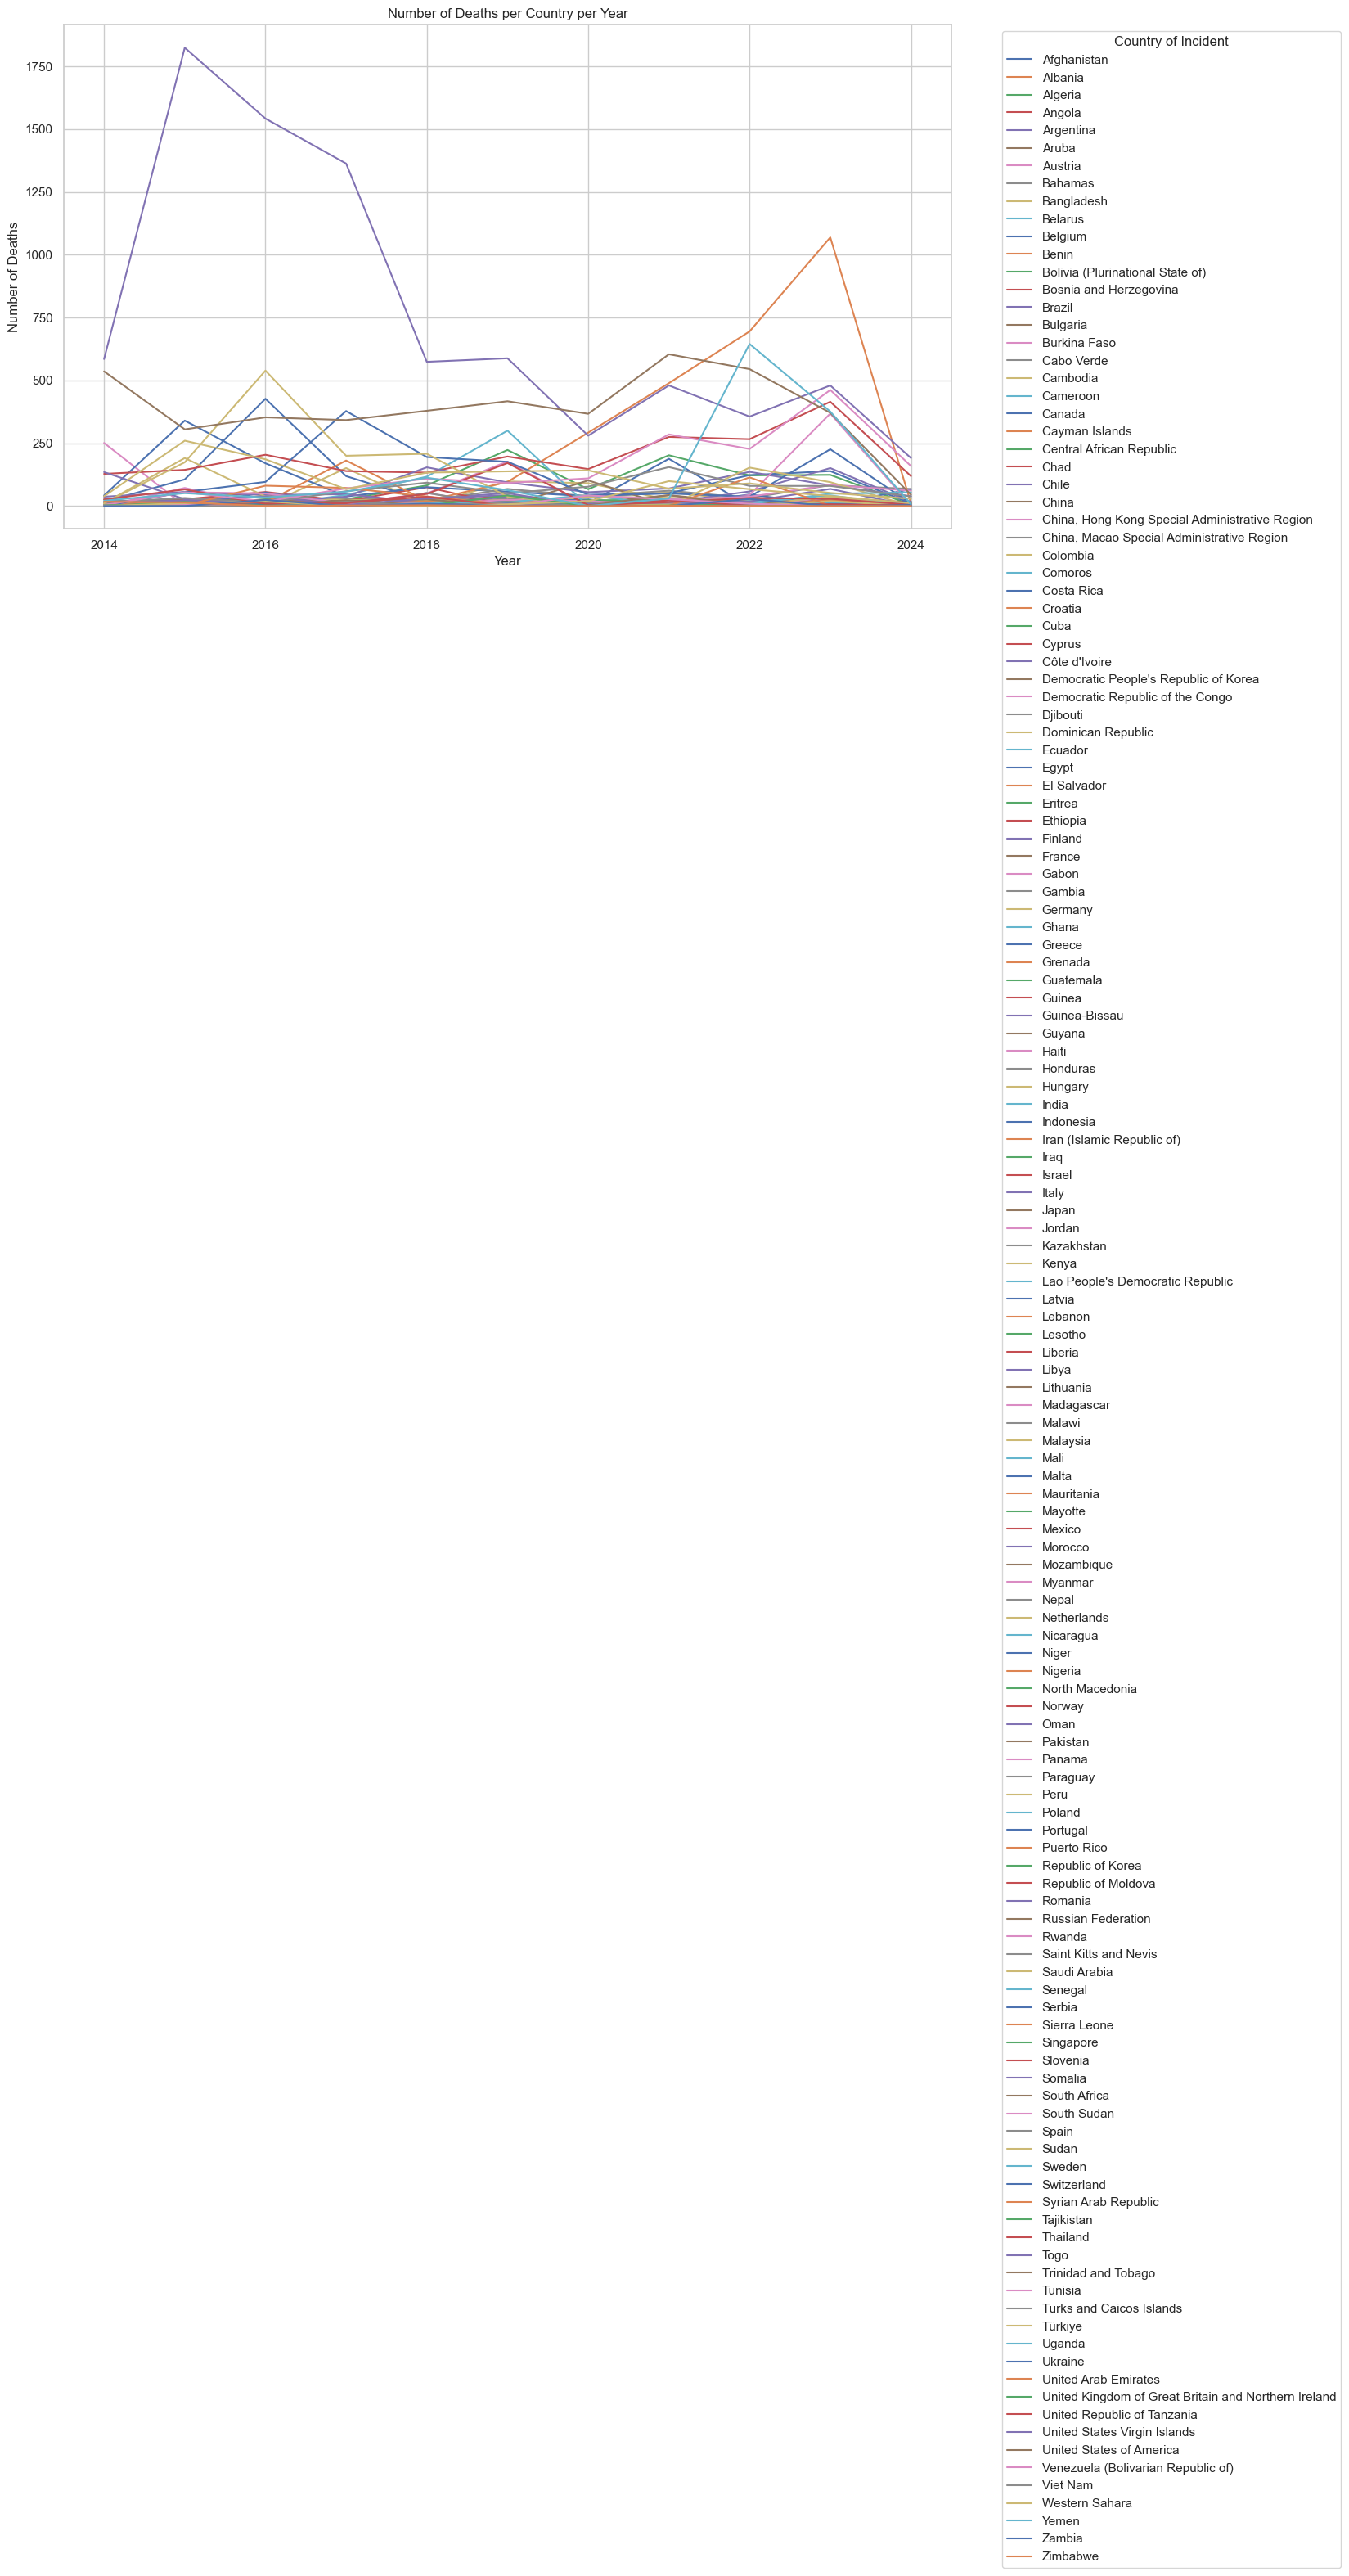

In [174]:
# Plotting Deaths per Year per Country
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

for country in deaths_pivot.index:
    plt.plot(deaths_pivot.columns, deaths_pivot.loc[country], label=country)

plt.title('Number of Deaths per Country per Year')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.legend(title='Country of Incident', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [164]:
# Calculated deaths per year per country

deaths_per_year_region = migrant_deaths_data.groupby(['Incident Year', 'Region of Incident'])['Number of Dead'].sum().reset_index(name='total_deaths')

# Pivot the DataFrame to have years as columns
deaths_pivot_region = deaths_per_year_region.pivot(index='Incident Year', columns='Region of Incident', values='total_deaths').fillna(0)

deaths_pivot_region.head(25)

Region of Incident,Caribbean,Central America,Central Asia,Eastern Africa,Eastern Asia,Europe,Mediterranean,Middle Africa,North America,Northern Africa,South America,South-eastern Asia,Southern Africa,Southern Asia,Western Africa,Western Asia
Incident Year,,,,,,,,,,,,,,,,
2014,31.0,117.0,0.0,430.0,0.0,22.0,725.0,0.0,530.0,28.0,0.0,44.0,0.0,2.0,0.0,51.0
2015,33.0,151.0,0.0,109.0,0.0,142.0,2187.0,0.0,305.0,699.0,2.0,315.0,3.0,22.0,64.0,65.0
2016,22.0,239.0,0.0,224.0,1.0,65.0,1704.0,0.0,343.0,1254.0,39.0,151.0,15.0,14.0,96.0,133.0
2017,44.0,153.0,0.0,108.0,1.0,59.0,928.0,4.0,342.0,1030.0,0.0,195.0,2.0,223.0,455.0,182.0
2018,10.0,141.0,52.0,227.0,3.0,110.0,696.0,86.0,379.0,655.0,27.0,82.0,1.0,34.0,445.0,255.0
2019,65.0,203.0,0.0,120.0,5.0,143.0,451.0,65.0,418.0,753.0,34.0,236.0,0.0,168.0,784.0,179.0
2020,18.0,158.0,0.0,172.0,1.0,81.0,504.0,19.0,367.0,204.0,98.0,98.0,0.0,386.0,140.0,109.0
2021,107.0,313.0,0.0,91.0,0.0,127.0,842.0,0.0,600.0,526.0,119.0,49.0,31.0,712.0,83.0,88.0
2022,115.0,354.0,0.0,58.0,1.0,146.0,892.0,33.0,526.0,400.0,58.0,150.0,61.0,703.0,73.0,855.0


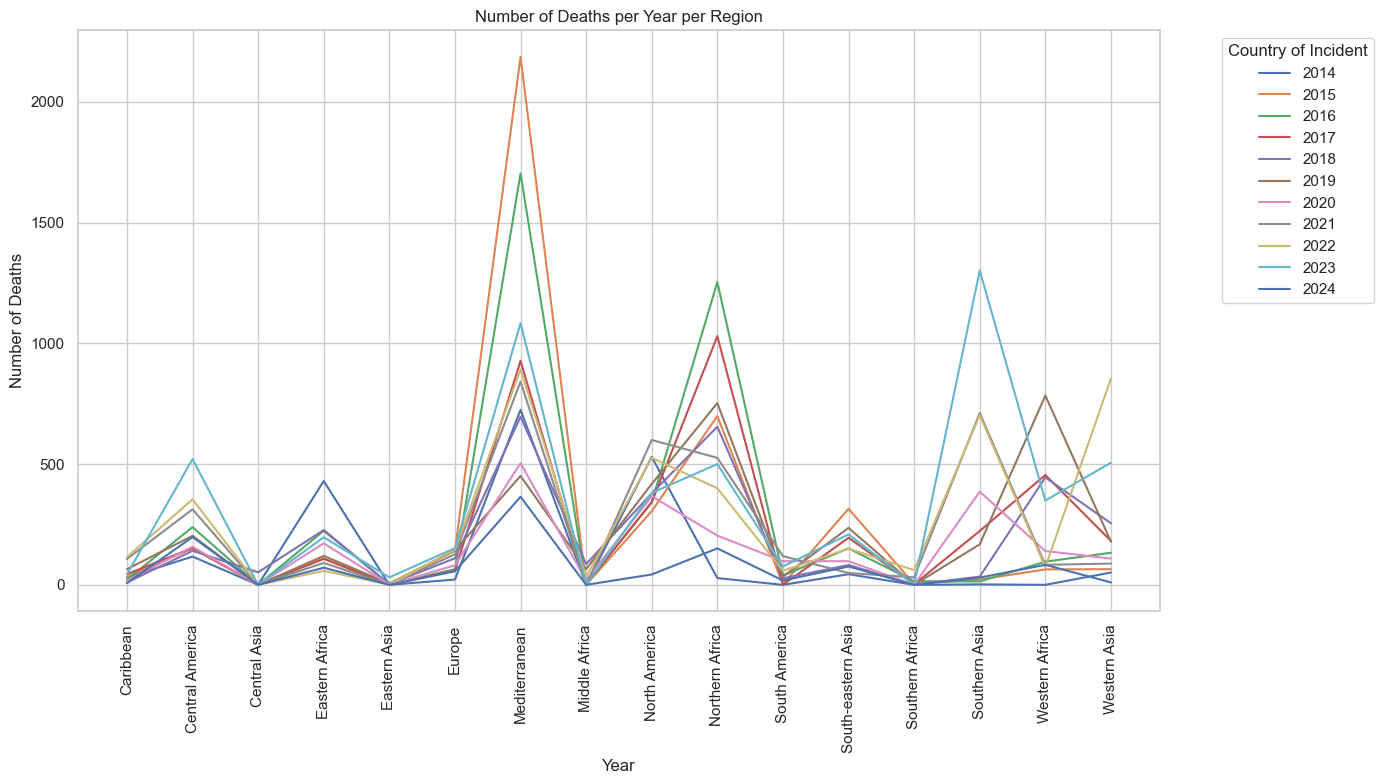

In [173]:
# Plotting Deaths per Country per Year
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

for country in deaths_pivot_region.index:
    plt.plot(deaths_pivot_region.columns, deaths_pivot_region.loc[country], label=country)

plt.title('Number of Deaths per Year per Region')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.legend(title='Country of Incident', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()